In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math


1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

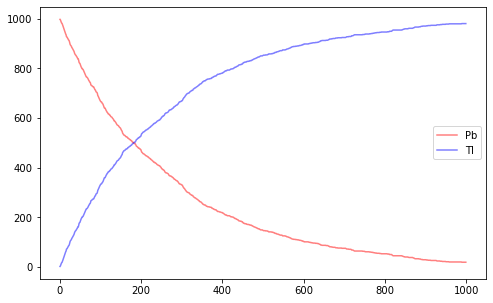

In [139]:
def p1(t):
    tau = 3.052*60 #in second
    return (1 - pow(2,-t/tau))

time = 1000
N_Tl = 1000
N_Pb = 0

Tl = []
Pb = []

for t in range(time):
    for atom in range(N_Tl):
        atom_decay = np.random.random()
        if (atom_decay < p(1)) and (N_Tl > 0): 
            N_Tl -=1
            N_Pb +=1
    Tl.append(N_Tl)
    Pb.append(N_Pb)

x = np.arange(0,time, 1)    

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x,Tl, color='r', alpha=0.5,label='Pb')
ax.plot(x,Pb, color='b', alpha=0.5,label='Tl')
ax.legend()


Text(0.5, 1.0, 'inverse transform method')

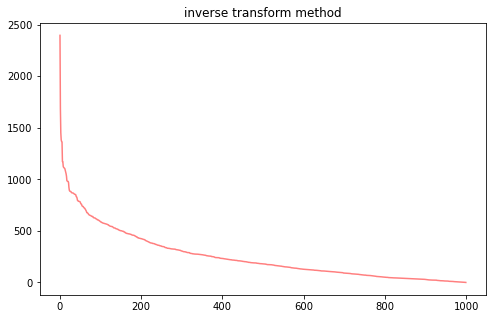

In [146]:
def p2(t):
    tau = 3.052*60 #in second
    return -tau*np.log2(1-t)

decay_t = p2(np.random.random(1000))

fig, ax = plt.subplots(figsize=(8,5))
ax.plot((np.sort(decay_t)[::-1]), color='r', alpha=0.5)
ax.set_title("inverse transform method")


2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

Integral Hit/Miss Method: 1.34576
Hit/Miss Error:  0.0
Integral Mean Value Method: 1.344829961628391
Mean Value Error:  0.0


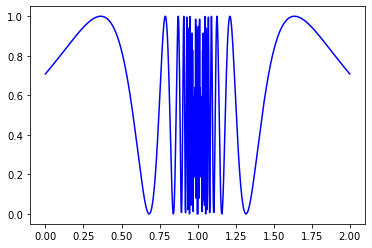

In [49]:
def f(x):
    return np.sin(1/(1-x))**2

N = 1000
x = np.linspace(0, 2, N)
plt.plot(x, f(x), 'b-')

# Monte Carlo integration
N = 100000
count = 0
for i in range(N):
    x = 2 * np.random.random() # x is random uniform between 0 and 2
    y = np.random.random()     # y is random uniform between 0 and 1
    if y < f(x): 
        count += 1

I = 2 * count / N
print("Integral Hit/Miss Method:", I)

I1 = np.mean(I)
err1 = np.std(I1) / np.sqrt(N)
print("Hit/Miss Error: ", err1)

# Monte Carlo integration mean value
sum_f = 0
for j in range(N):
    x = 2 * np.random.random()  
    fv = f(x) 
    sum_f += fv


I2_mean = sum_f / N
I2 = 2* I2_mean

print("Integral Mean Value Method:", I2)

err2 = np.std(I2_mean) / np.sqrt(N)
print("Mean Value Error: ", err2)

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [68]:
def f2(x, y):    
    if (x**2 + y**2) <= 1:
        sol = 1
    else:
        sol = 0
    return sol

N = 10000
count_circ = 0

for i in range(N):
    x = np.random.random() 
    y = np.random.random()     
    if f2(x,y): 
        count_circ += 1

I_cir = 4 * (count_circ / N)
print("Integral Circle: ", I_cir)


Integral Circle:  3.1316


In [81]:
#Generalized function for all dimensions
def f3(param):    
    sol = 0
    for i in param:
        sol += i**2
    if sol <= 1:
        return 1
    else:
        return 0

count_in_sphere = 0

for count_loops in range(N):
    points = []
    for j in range(10):
        points.append(np.random.random())
    if (f3(points)):
        count_in_sphere += 1

I_sph = 2**10*count_in_sphere/N

print("10D Sphere volume:", I_sph)


10D volume: 2.6624


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [87]:
def w(x):
    return 1/np.sqrt(x)

def f4(x):
    return (x**(-1/2)) / (np.exp(x) + 1)

N = 10000
I4 = []
for i in range(100):
    x = np.random.random(N)**2 # random points in [0,1)
    I4.append(2 * np.sum(f4(x)/w(x)) / N)

I4 = np.mean(I4)
print("Integral: ", I4)

Integral:  0.8390442946576675
